## Package Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [3]:
crime_in = pd.read_csv('crimedata2.csv')
print(crime_in.shape)
crime_in.head()

(2215, 147)


,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


## Data initial exploration

In [4]:
crime_in = crime_in.replace('?', np.nan)
crime_in.isnull().sum()

communityname             0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64

In [5]:
crime_in.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,NaN,9988.79


(1994, 147)


/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_5180/3062771644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


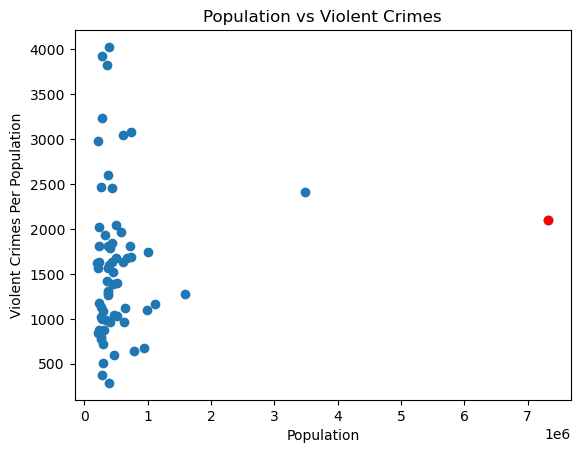

In [6]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
print(crime_in_cleaned.shape)
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))
crime_in_cleaned = crime_in_cleaned[(crime_in_cleaned['population'] >= 200000)]


plt.scatter(crime_in_cleaned['population'], crime_in_cleaned['ViolentCrimesPerPop'])

charlotte = crime_in_cleaned[crime_in_cleaned['communityname'] == 'NewYorkcity']
plt.scatter(charlotte['population'], charlotte['ViolentCrimesPerPop'], color='red')
plt.title('Population vs Violent Crimes')
plt.xlabel('Population')
plt.ylabel('Violent Crimes Per Population')
plt.show()

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_5180/1468331952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


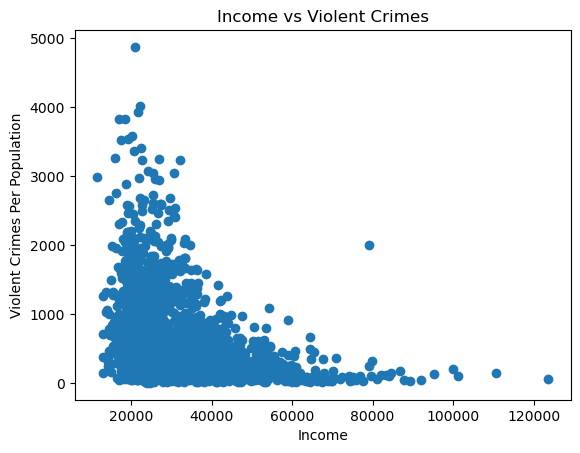

In [7]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


plt.scatter(crime_in_cleaned['medIncome'], crime_in_cleaned['ViolentCrimesPerPop'])
plt.title('Income vs Violent Crimes')
plt.xlabel('Income')
plt.ylabel('Violent Crimes Per Population')
plt.show()

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_5180/2269306917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


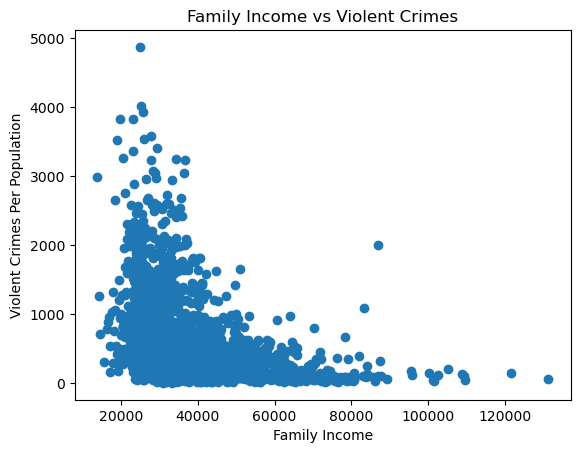

In [8]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


plt.scatter(crime_in_cleaned['medFamInc'], crime_in_cleaned['ViolentCrimesPerPop'])
plt.title('Family Income vs Violent Crimes')
plt.xlabel('Family Income')
plt.ylabel('Violent Crimes Per Population')
plt.show()

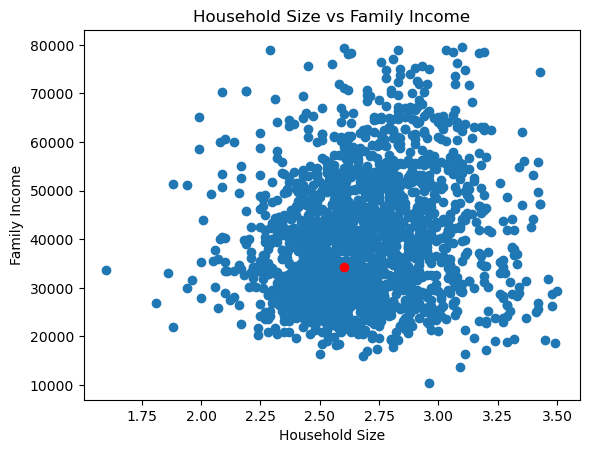

In [9]:
crime_in_cleaned = crime_in[(crime_in['householdsize'] <= 3.5) & (crime_in['medFamInc'] <= 80000)]
plt.scatter(crime_in_cleaned['householdsize'], crime_in_cleaned['medFamInc'])

charlotte = crime_in_cleaned[crime_in_cleaned['communityname'] == 'NewYorkcity']
plt.scatter(charlotte['householdsize'], charlotte['medFamInc'], color='red')
plt.title('Household Size vs Family Income')
plt.xlabel('Household Size')
plt.ylabel('Family Income')
plt.show()

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_5180/1136201912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


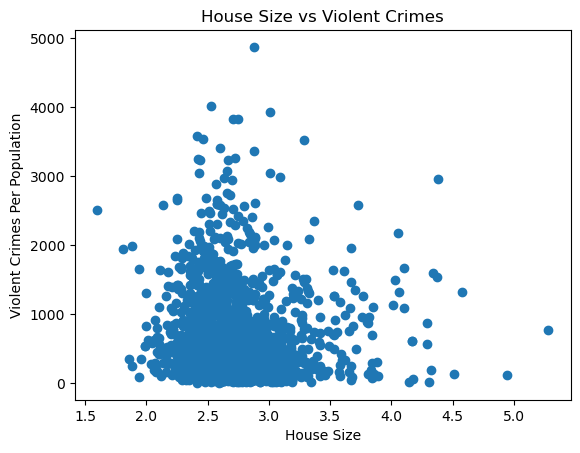

In [10]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))

plt.scatter(crime_in_cleaned['householdsize'], crime_in_cleaned['ViolentCrimesPerPop'])
plt.title('House Size vs Violent Crimes')
plt.xlabel('House Size')
plt.ylabel('Violent Crimes Per Population')
plt.show()



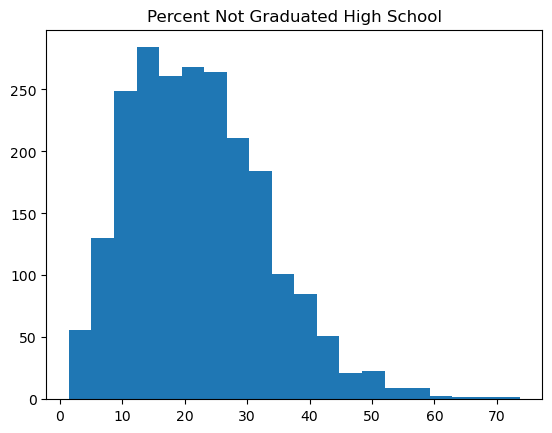

In [11]:
crime_in_cleaned = crime_in.dropna(subset=['PctNotHSGrad'])
crime_in_cleaned['PctNotHSGrad'] = (crime_in_cleaned['PctNotHSGrad'].astype(float))

plt.hist(crime_in_cleaned['PctNotHSGrad'], bins=20)
plt.title('Percent Not Graduated High School')
plt.show()

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_5180/4258219641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


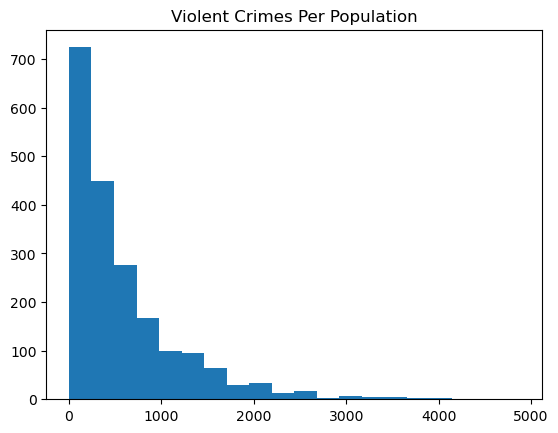

In [12]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))
plt.hist(crime_in_cleaned['ViolentCrimesPerPop'], bins=20)
plt.title('Violent Crimes Per Population')
plt.show()

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_5180/248785322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['nonViolPerPop'] = (crime_in_cleaned['nonViolPerPop'].astype(float))


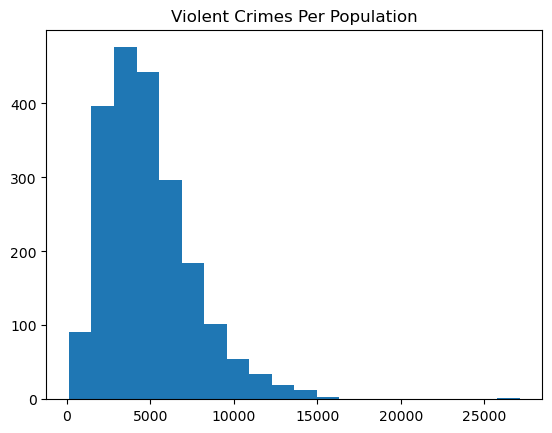

In [13]:
crime_in_cleaned = crime_in.dropna(subset=['nonViolPerPop'])
crime_in_cleaned['nonViolPerPop'] = (crime_in_cleaned['nonViolPerPop'].astype(float))

plt.hist(crime_in_cleaned['nonViolPerPop'], bins=20)
plt.title('Violent Crimes Per Population')
plt.show()

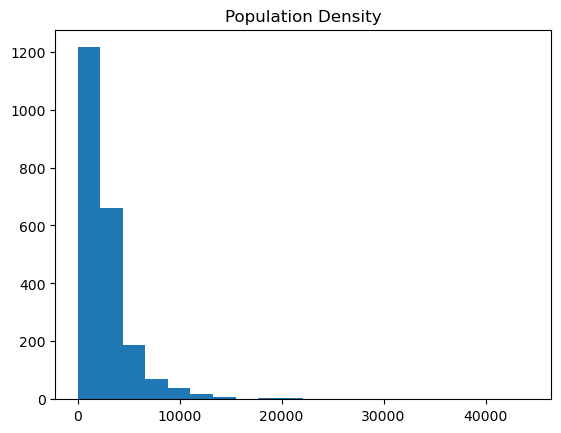

In [14]:
crime_in_cleaned = crime_in.dropna(subset=['PopDens'])
crime_in_cleaned['PopDens'] = (crime_in_cleaned['PopDens'].astype(float))

plt.hist(crime_in_cleaned['PopDens'], bins=20)
plt.title('Population Density')
plt.show()

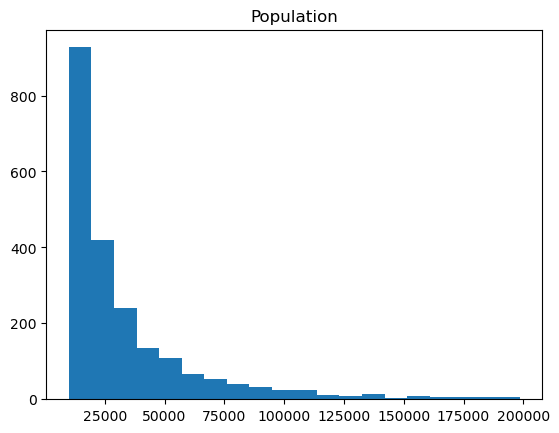

In [15]:
crime_in_cleaned = crime_in.dropna(subset=['population'])
crime_in_cleaned['population'] = (crime_in_cleaned['population'].astype(float))
crime_in_cleaned = crime_in_cleaned[(crime_in_cleaned['population'] <= 200000)]

plt.hist(crime_in_cleaned['population'], bins=20)
plt.title('Population')
plt.show()

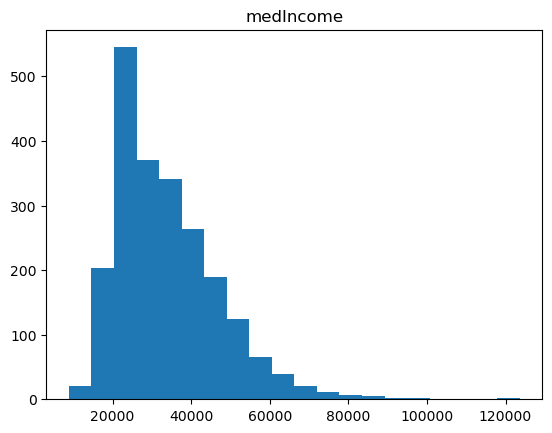

In [16]:
crime_in_cleaned = crime_in.dropna(subset=['medIncome'])
crime_in_cleaned['medIncome'] = (crime_in_cleaned['medIncome'].astype(float))

plt.hist(crime_in_cleaned['medIncome'], bins=20)
plt.title('medIncome')
plt.show()

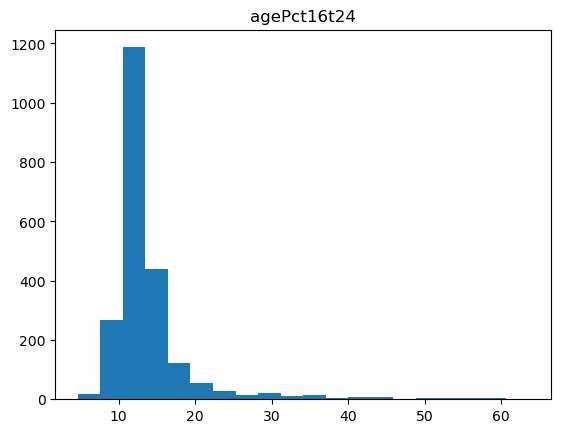

In [17]:
crime_in_cleaned = crime_in.dropna(subset=['agePct16t24'])
crime_in_cleaned['agePct16t24'] = (crime_in_cleaned['agePct16t24'].astype(float))

plt.hist(crime_in_cleaned['agePct16t24'], bins=20)
plt.title('agePct16t24')
plt.show()

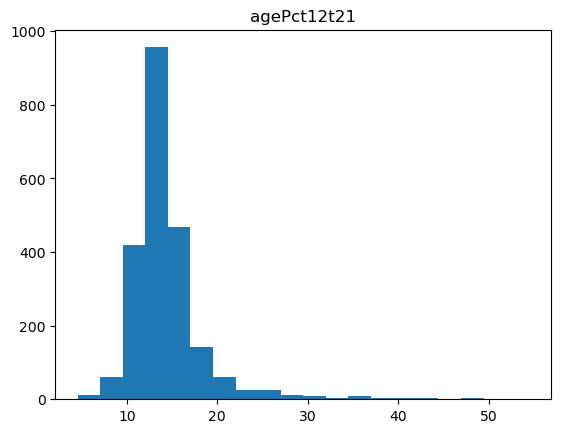

In [18]:
crime_in_cleaned = crime_in.dropna(subset=['agePct12t21'])
crime_in_cleaned['agePct12t21'] = (crime_in_cleaned['agePct12t21'].astype(float))

plt.hist(crime_in_cleaned['agePct12t21'], bins=20)
plt.title('agePct12t21')
plt.show()

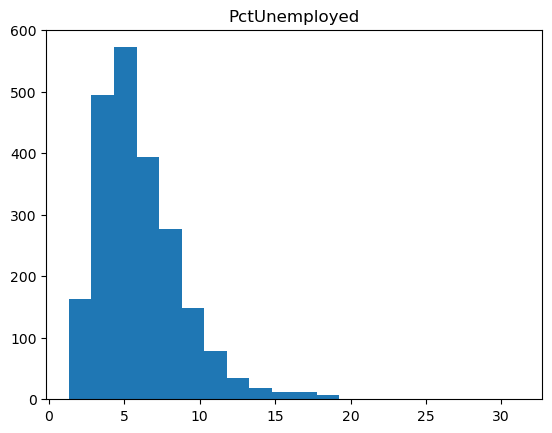

In [19]:
crime_in_cleaned = crime_in.dropna(subset=['PctUnemployed'])
crime_in_cleaned['PctUnemployed'] = (crime_in_cleaned['PctUnemployed'].astype(float))

plt.hist(crime_in_cleaned['PctUnemployed'], bins=20)
plt.title('PctUnemployed')
plt.show()

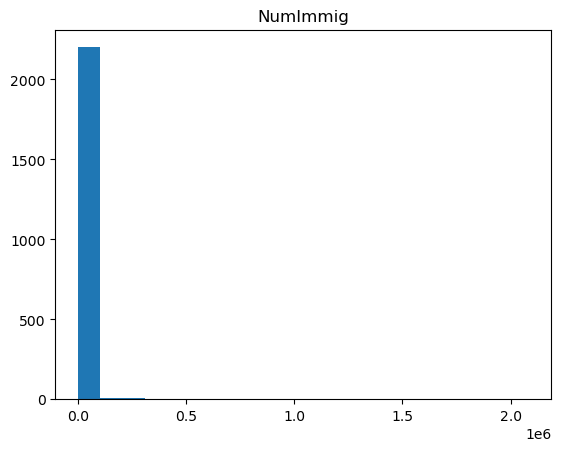

In [20]:
crime_in_cleaned = crime_in.dropna(subset=['NumImmig'])
crime_in_cleaned['NumImmig'] = (crime_in_cleaned['NumImmig'].astype(float))

plt.hist(crime_in_cleaned['NumImmig'], bins=20)
plt.title('NumImmig')
plt.show()

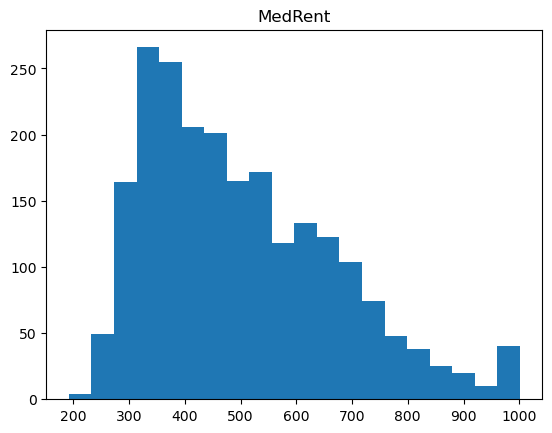

In [21]:
crime_in_cleaned = crime_in.dropna(subset=['MedRent'])
crime_in_cleaned['MedRent'] = (crime_in_cleaned['MedRent'].astype(float))

plt.hist(crime_in_cleaned['MedRent'], bins=20)
plt.title('MedRent')
plt.show()

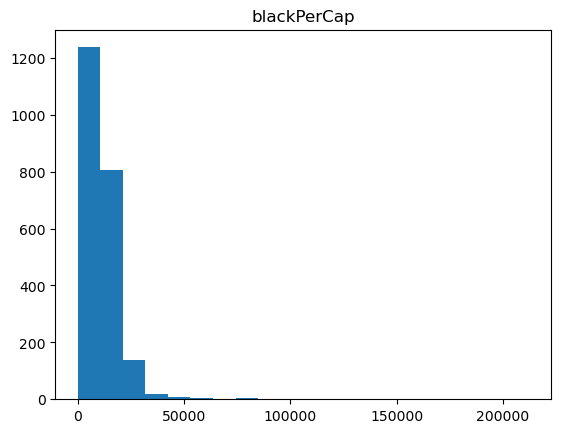

In [22]:
crime_in_cleaned = crime_in.dropna(subset=['blackPerCap'])
crime_in_cleaned['blackPerCap'] = (crime_in_cleaned['blackPerCap'].astype(float))

plt.hist(crime_in_cleaned['blackPerCap'], bins=20)
plt.title('blackPerCap')
plt.show()

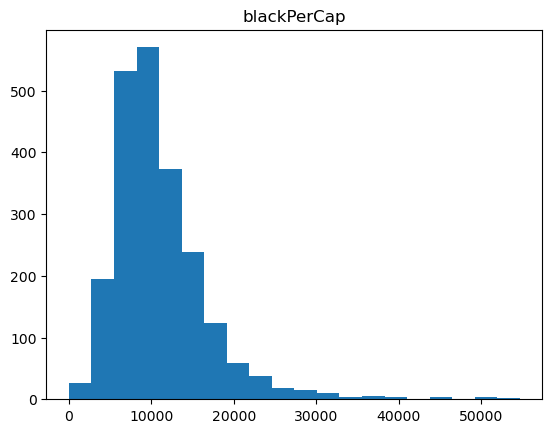

In [23]:

crime_in_cleaned = crime_in.dropna(subset=['HispPerCap'])
crime_in_cleaned['HispPerCap'] = (crime_in_cleaned['HispPerCap'].astype(float))

plt.hist(crime_in_cleaned['HispPerCap'], bins=20)
plt.title('blackPerCap')
plt.show()

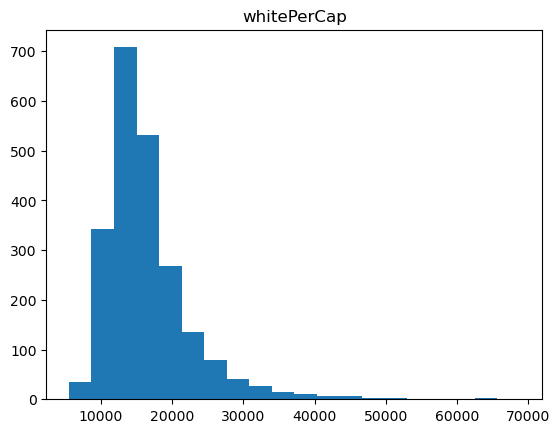

In [24]:

crime_in_cleaned = crime_in.dropna(subset=['whitePerCap'])
crime_in_cleaned['whitePerCap'] = (crime_in_cleaned['whitePerCap'].astype(float))

plt.hist(crime_in_cleaned['whitePerCap'], bins=20)
plt.title('whitePerCap')
plt.show()

In [25]:
# make a crime_clean_set with all the columns used above
crime_clean_set = crime_in[['communityname', 'state','population', 'medIncome', 'medFamInc', 'householdsize', 'PctNotHSGrad', 'ViolentCrimesPerPop', 
                            'nonViolPerPop', 'PopDens', 'agePct16t24', 'agePct12t21', 'PctUnemployed', 'NumImmig', 
                            'MedRent', 'blackPerCap', 'HispPerCap', 'whitePerCap']]
# drop the nans from violent crimes per population
crime_clean_set = crime_clean_set.dropna(subset=['ViolentCrimesPerPop'])


In [26]:
# KNN interpolation on the rest of the columns
crime_clean_set = crime_clean_set.interpolate(method='nearest')
crime_clean_set.to_csv('crime_clean_set.csv', index=False)

In [27]:
crime_clean_set

,communityname,state,population,medIncome,medFamInc,householdsize,PctNotHSGrad,ViolentCrimesPerPop,nonViolPerPop,PopDens,agePct16t24,agePct12t21,PctUnemployed,NumImmig,MedRent,blackPerCap,HispPerCap,whitePerCap
0,BerkeleyHeightstownship,NJ,11980,75122,79584,3.10,9.90,41.02,1394.59,1845.9,10.93,12.47,2.70,1277,1001,13600,22838,30233
1,Marpletownship,PA,23123,47917,55323,2.82,13.72,127.56,1955.95,2186.7,10.48,11.01,2.43,1920,627,18137,12222,20191
2,Tigardcity,OR,29344,35669,42112,2.43,9.09,218.59,6167.51,2780.9,11.01,11.36,4.01,1468,484,16644,8405,17103
3,Gloversvillecity,NY,16656,20580,26501,2.40,33.68,306.64,NaN,3217.7,12.19,12.55,9.86,339,333,9984,4391,10909
5,Springfieldcity,MO,140494,21577,27705,2.45,23.03,442.95,6867.42,1995.7,20.04,18.09,5.72,2091,340,7382,8104,12029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,56216,24727,27388,3.07,30.87,545.75,7356.84,3365.4,14.34,15.46,9.99,10623,438,8344,6644,13041
2211,Pinevillecity,LA,12251,20321,25000,2.68,27.71,124.1,5824.44,1682.8,16.97,17.36,7.90,275,330,5768,4883,11353
2212,Yucaipacity,CA,32824,27182,34973,2.46,26.14,353.83,4654.2,1195.2,9.53,11.81,5.18,2414,514,13630,9398,14416
2213,Beevillecity,TX,13547,19899,22103,2.89,39.63,691.17,5340.87,2142.2,14.73,17.16,12.12,309,316,6437,5338,9555


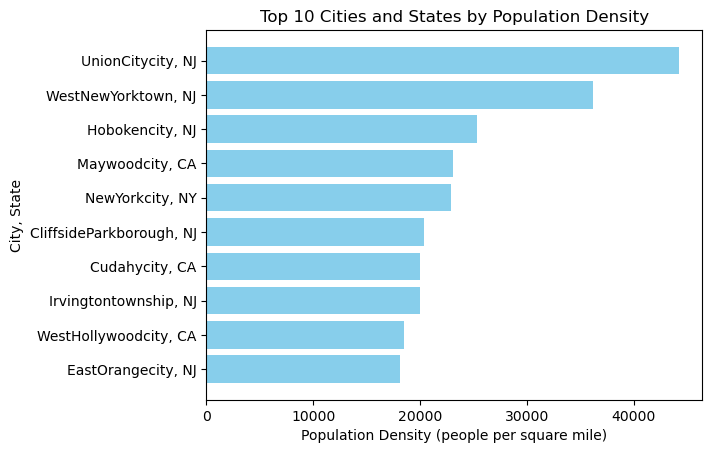

In [29]:
top_10 = crime_clean_set.sort_values(by='PopDens', ascending=False).head(10)
top_10['City_State'] = top_10['communityname'] + ', ' + top_10['state']

plt.barh(top_10['City_State'], top_10['PopDens'], color='skyblue')

plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Population Density (people per square mile)')
plt.ylabel('City, State')
plt.title('Top 10 Cities and States by Population Density')

# Show the plot
plt.show()

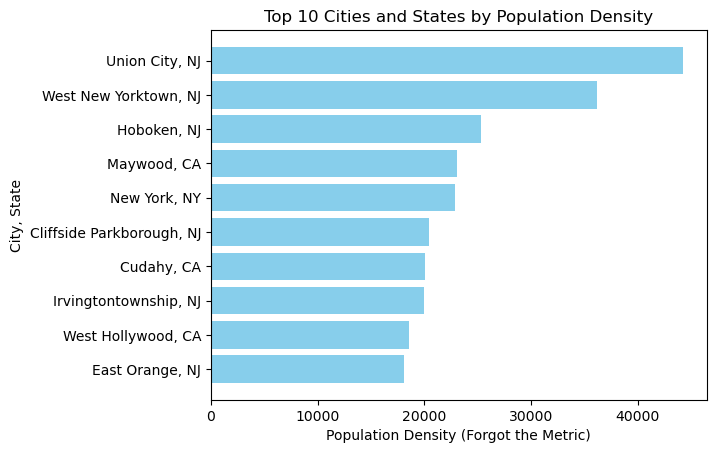

In [32]:
import matplotlib.pyplot as plt


def clean_city_name(city):
    
    if city.endswith('city'):
        city = city[:-4]  #
    
    
    cleaned_city = ''
    for i, char in enumerate(city):
        if i > 0 and char.isupper() and city[i-1].islower():  
            cleaned_city += ' '  
        cleaned_city += char  
    
    return cleaned_city


top_10 = crime_clean_set.sort_values(by='PopDens', ascending=False).head(10)
top_10['communityname'] = top_10['communityname'].apply(clean_city_name)


top_10['City_State'] = top_10['communityname'] + ', ' + top_10['state']


plt.barh(top_10['City_State'], top_10['PopDens'], color='skyblue')

#
plt.gca().invert_yaxis()


plt.xlabel('Population Density (Forgot the Metric)')
plt.ylabel('City, State')
plt.title('Top 10 Cities and States by Population Density')


plt.show()

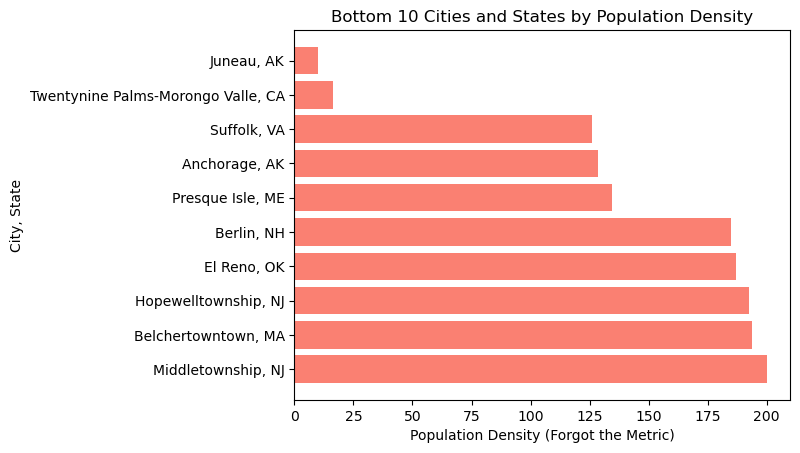

In [34]:
import matplotlib.pyplot as plt

def clean_city_name(city):
    if city.endswith('city'):
        city = city[:-4]
    
    cleaned_city = ''
    for i, char in enumerate(city):
        if i > 0 and char.isupper() and city[i-1].islower():
            cleaned_city += ' '
        cleaned_city += char
    
    return cleaned_city

# Get the bottom 10 cities by population density
bottom_10 = crime_clean_set.sort_values(by='PopDens', ascending=True).head(10)
bottom_10['communityname'] = bottom_10['communityname'].apply(clean_city_name)

bottom_10['City_State'] = bottom_10['communityname'] + ', ' + bottom_10['state']

plt.barh(bottom_10['City_State'], bottom_10['PopDens'], color='salmon')

plt.gca().invert_yaxis()

plt.xlabel('Population Density (Forgot the Metric)')
plt.ylabel('City, State')
plt.title('Bottom 10 Cities and States by Population Density')

plt.show()